# Lab | Data Structuring and Combining Data

## Challenge 1: Combining & Cleaning Data

In this challenge, we will be working with the customer data from an insurance company, as we did in the two previous labs. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

But this time, we got new data, which can be found in the following 2 CSV files located at the links below.

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv

Note that you'll need to clean and format the new data.

Observation:
- One option is to first combine the three datasets and then apply the cleaning function to the new combined dataset
- Another option would be to read the clean file you saved in the previous lab, and just clean the two new files and concatenate the three clean datasets

In [6]:
import pandas as pd

# Load all datasets
df1 = pd.read_csv("file1.csv")
df2 = pd.read_csv("file2.csv")
df3 = pd.read_csv("file3.csv")

# Rename columns for consistency
df1 = df1.rename(columns={"ST": "State", "GENDER": "Gender"})
df2 = df2.rename(columns={"ST": "State", "GENDER": "Gender"})
# df3 already has correct column names

# Concatenate the datasets
df = pd.concat([df1, df2, df3], ignore_index=True)

# Strip % and convert 'Customer Lifetime Value' to float
df['Customer Lifetime Value'] = df['Customer Lifetime Value'].astype(str).str.replace('%', '', regex=False)
df['Customer Lifetime Value'] = pd.to_numeric(df['Customer Lifetime Value'], errors='coerce')

# Convert 'Number of Open Complaints' to numeric by extracting numeric value
df['Number of Open Complaints'] = df['Number of Open Complaints'].astype(str).str.extract(r'(\d+)')
df['Number of Open Complaints'] = pd.to_numeric(df['Number of Open Complaints'], errors='coerce')

# Standardize column names (snake_case)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop rows with critical missing values (e.g., customer id)
df = df.dropna(subset=['customer'])

# Fill remaining missing values with reasonable defaults
df['gender'] = df['gender'].fillna('Unknown')
df['customer_lifetime_value'] = df['customer_lifetime_value'].fillna(df['customer_lifetime_value'].median())
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(0)

# Remove duplicates
df = df.drop_duplicates()

# Save cleaned file
df.to_csv("combined_cleaned.csv", index=False)

# Challenge 2: Structuring Data

In this challenge, we will continue to work with customer data from an insurance company, but we will use a dataset with more columns, called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing data cleaning, formatting, and structuring.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

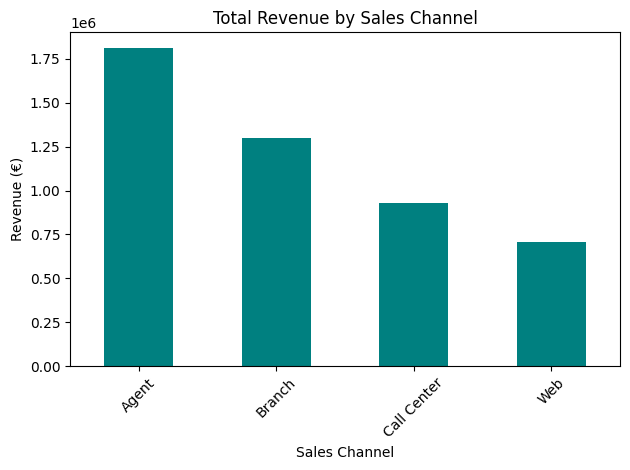

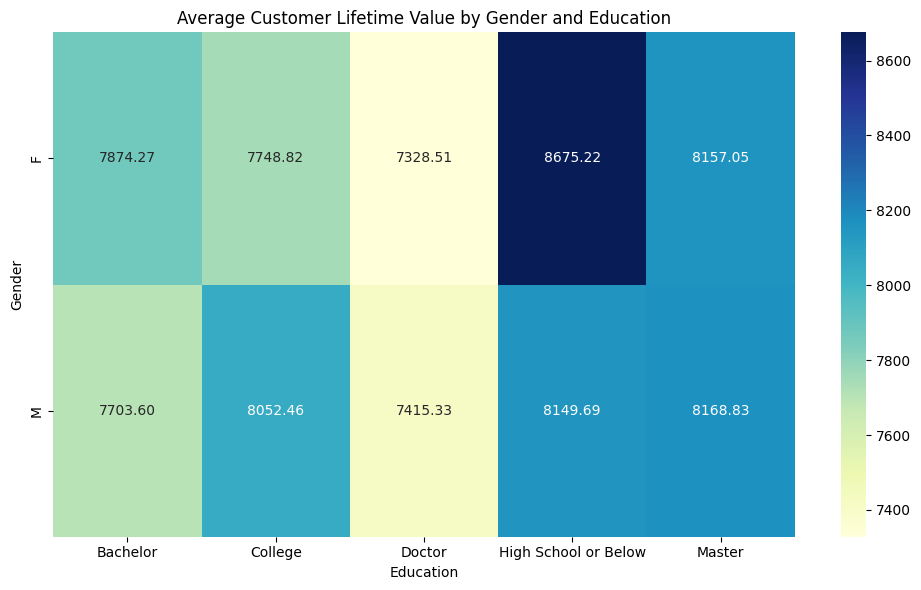

In [ ]:
# Your code goes here
import pandas as pd

# Load the dataset
file_path = "marketing_customer_analysis_clean.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Optional: check data types and basic structure
print(df.info())
print(df.head())

# ----- Pivot Table 1: Total Revenue by Sales Channel -----
revenue_by_channel = pd.pivot_table(
    df,
    values='total_claim_amount',
    index='sales_channel',
    aggfunc='sum'
).round(2).sort_values(by='total_claim_amount', ascending=False)

print("Total Revenue by Sales Channel:")
print(revenue_by_channel)

# ----- Pivot Table 2: Average CLV by Gender and Education -----
clv_by_gender_education = pd.pivot_table(
    df,
    values='customer_lifetime_value',
    index='gender',
    columns='education',
    aggfunc='mean'
).round(2)

print("\nAverage Customer Lifetime Value by Gender and Education:")
print(clv_by_gender_education)

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for revenue by sales channel
revenue_by_channel.plot(kind='bar', legend=False, color='teal')
plt.title('Total Revenue by Sales Channel')
plt.ylabel('Revenue (€)')
plt.xlabel('Sales Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap by gender and education
plt.figure(figsize=(10, 6))
sns.heatmap(clv_by_gender_education, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Average Customer Lifetime Value by Gender and Education')
plt.ylabel('Gender')
plt.xlabel('Education')
plt.tight_layout()
plt.show()



1. You work at the marketing department and you want to know which sales channel brought the most sales in terms of total revenue. Using pivot, create a summary table showing the total revenue for each sales channel (branch, call center, web, and mail).
Round the total revenue to 2 decimal points.  Analyze the resulting table to draw insights.

2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

## Bonus

You work at the customer service department and you want to know which months had the highest number of complaints by policy type category. Create a summary table showing the number of complaints by policy type and month.
Show it in a long format table.

*In data analysis, a long format table is a way of structuring data in which each observation or measurement is stored in a separate row of the table. The key characteristic of a long format table is that each column represents a single variable, and each row represents a single observation of that variable.*

*More information about long and wide format tables here: https://www.statology.org/long-vs-wide-data/*

Number of Complaints by Policy Type and Month:
month              1     2
policy_type               
Corporate Auto   443   385
Personal Auto   1727  1453
Special Auto      87    95


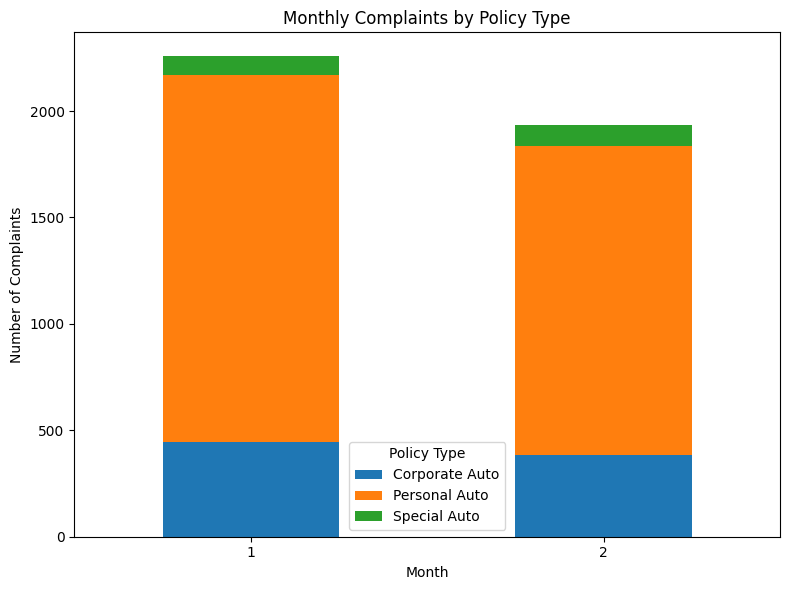

In [ ]:
# Your code goes here
import pandas as pd

# Load the dataset
file_path = "marketing_customer_analysis_clean.csv"  # watch your path, Geo!
df = pd.read_csv("marketing_customer_analysis_clean.csv")

# Create a pivot table for number of complaints by policy_type and month
complaints_summary = pd.pivot_table(
    df,
    values='number_of_open_complaints',
    index='policy_type',
    columns='month',
    aggfunc='sum',
    fill_value=0  # Replace NaNs with 0 for clarity
).astype(int)  # Convert to integer for cleaner output

# Display the summary table
print("Number of Complaints by Policy Type and Month:")
print(complaints_summary)

import matplotlib.pyplot as plt

# Plot stacked bar chart!! fun!
complaints_summary.T.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Monthly Complaints by Policy Type')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.legend(title='Policy Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


